In [78]:
import os
import pandas as pd
from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib import pyplot
import matplotlib.dates as mdates

from datetime import datetime, timedelta

from warnings import catch_warnings
from warnings import filterwarnings

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import VAR

In [79]:
#import dataset
df = pd.read_csv('df_bike_example.csv', index_col='Date')
df.index = pd.to_datetime(df.index, format = '%Y-%m-%d')
df

,Rented_Bikes,Temperature,Humidity_percent
Date,,,
2017-12-01,9539,-2.454167,45.875000
2017-12-02,8523,1.325000,61.958333
2017-12-03,7222,4.875000,81.541667
2017-12-04,8729,-0.304167,52.500000
2017-12-05,8307,-4.458333,36.416667
...,...,...,...
2018-11-26,17162,6.320833,70.500000
2018-11-27,16282,7.066667,68.000000
2018-11-28,16524,5.304167,25.791667


In [80]:
#train and test slice
pred_from = datetime(2018,10,1)
pred_until = datetime(2018,11,30)

df_train = df[:pred_from - timedelta(days=1)]
df_test = df[pred_from:]

In [81]:
model = VAR(df_train)
model_fitted = model.fit(10)

lagged_values = df_train.values[-10:]
pred = model_fitted.forecast(y=lagged_values, steps= (pred_until - pred_from).days + 1) 
pred = pd.DataFrame(pred, index = df_test.index , columns=df_test.columns + '_pred')
df = pd.merge(df, pred, left_index=True, right_index=True)
df

/Users/amitsasson/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


,Rented_Bikes,Temperature,Humidity_percent,Rented_Bikes_pred,Temperature_pred,Humidity_percent_pred
Date,,,,,,
2018-10-01,27909,15.437500,54.250000,17333.697541,17.084559,61.711159
2018-10-02,0,15.783333,60.791667,13923.083602,16.560514,62.173026
2018-10-03,30349,17.241667,59.125000,20481.551683,17.990109,55.617244
2018-10-04,0,18.895833,56.833333,14782.957432,17.213447,63.431255
2018-10-05,4522,17.095833,81.333333,18211.110333,18.954887,55.450825
...,...,...,...,...,...,...
2018-11-26,17162,6.320833,70.500000,19760.232827,18.933327,60.363872
2018-11-27,16282,7.066667,68.000000,19784.003015,18.955727,60.383852
2018-11-28,16524,5.304167,25.791667,19807.580303,18.978081,60.403551


,Rented_Bikes,Temperature,Humidity_percent,Rented_Bikes_pred,Temperature_pred,Humidity_percent_pred
Date,,,,,,
2018-10-01,27909,15.437500,54.250000,17333.697541,17.084559,61.711159
2018-10-02,0,15.783333,60.791667,13923.083602,16.560514,62.173026
2018-10-03,30349,17.241667,59.125000,20481.551683,17.990109,55.617244
2018-10-04,0,18.895833,56.833333,14782.957432,17.213447,63.431255
2018-10-05,4522,17.095833,81.333333,18211.110333,18.954887,55.450825
...,...,...,...,...,...,...
2018-11-26,17162,6.320833,70.500000,19760.232827,18.933327,60.363872
2018-11-27,16282,7.066667,68.000000,19784.003015,18.955727,60.383852
2018-11-28,16524,5.304167,25.791667,19807.580303,18.978081,60.403551


<AxesSubplot:xlabel='Date'>

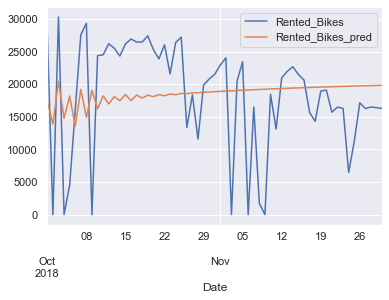

In [75]:
df[['Rented_Bikes','Rented_Bikes_pred']].plot()

In [76]:
sqrt(mean_squared_error(df['Rented_Bikes'], df['Rented_Bikes_pred']))

8520.57977021761

<AxesSubplot:xlabel='Date'>

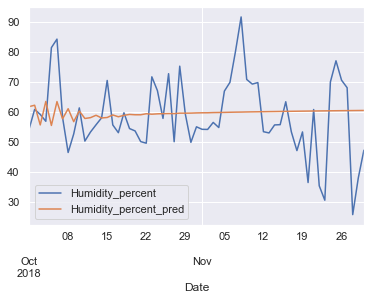

In [82]:
df[['Humidity_percent','Humidity_percent_pred']].plot()

In [ ]:
Temperature